In [1]:
import cv2 as cv
import numpy as np
import os
from matplotlib import pyplot as plt

In [2]:
# load the image(BGR) by cv2
"""
img = cv.cvtColor(cv.imread('test.png'), cv.COLOR_BGR2RGB).astype(np.float32)/255.0
lab = cv.cvtColor(img, cv.COLOR_RGB2LAB)
img = (cv.cvtColor(lab, cv.COLOR_LAB2RGB))*255
"""

"\nimg = cv.cvtColor(cv.imread('test.png'), cv.COLOR_BGR2RGB).astype(np.float32)/255.0\nlab = cv.cvtColor(img, cv.COLOR_RGB2LAB)\nimg = (cv.cvtColor(lab, cv.COLOR_LAB2RGB))*255\n"

True

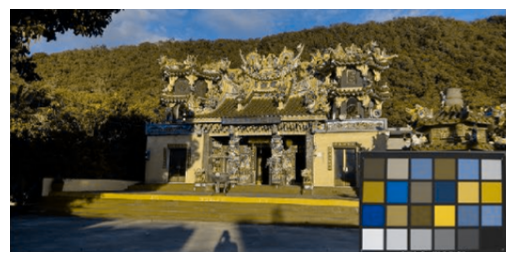

In [3]:
# Red-Green color blindness
img = cv.imread('images/test.png').astype(np.float32)/255.0
lab = cv.cvtColor(img, cv.COLOR_BGR2LAB)
lab[:,:,1] *=0
img = (cv.cvtColor(lab, cv.COLOR_LAB2BGR))*255
img = img.astype(np.uint8)

fig = plt.figure()
plt.axis('off')
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))

if not os.path.exists('images'):
    os.mkdir('images')
cv.imwrite('images/ex2.2.1.jpg', img)

True

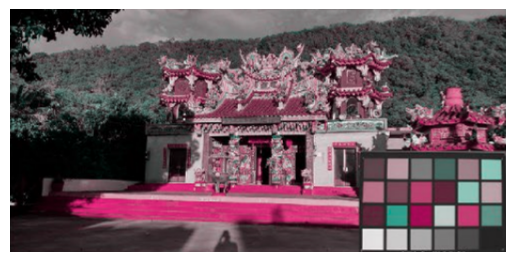

In [4]:
# Blue-Yellow color blindness
img = cv.imread('images/test.png').astype(np.float32)/255.0
lab = cv.cvtColor(img, cv.COLOR_BGR2LAB)
lab[:,:,2] *=0
img = (cv.cvtColor(lab, cv.COLOR_LAB2BGR))*255
img = img.astype(np.uint8)

fig = plt.figure()
plt.axis('off')
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))

if not os.path.exists('images'):
    os.mkdir('images')
cv.imwrite('images/ex2.2.2.jpg', img)

True

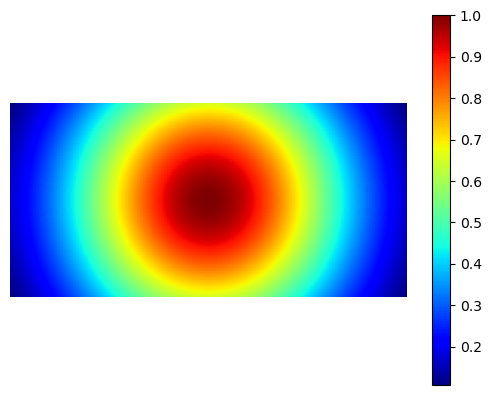

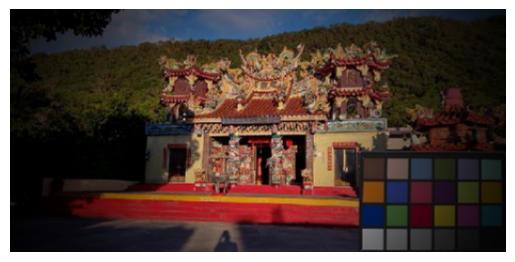

In [5]:
# Glaucoma
img = cv.imread('images/test.png').astype(np.float32)/255.0

# Gaussian kernel
x, y = np.mgrid[-np.size(img,0)/2:np.size(img,0)/2, int(-np.size(img,1)/2):int(np.size(img,1)/2)+1]
sigma = 14**2
gaussian_kernel= np.exp(-(x**2+y**2)/(sigma**2))

#Normalization
gaussian_kernel = gaussian_kernel / gaussian_kernel.max()
blur = np.zeros(img.shape)
fig = plt.figure()
plt.axis('off')
plt.imshow(gaussian_kernel, cmap=plt.get_cmap('jet'), interpolation='nearest')
plt.colorbar()

blur[:,:,0] = (img[:,:,0] * gaussian_kernel)
blur[:,:,1] = (img[:,:,1] * gaussian_kernel)
blur[:,:,2] = (img[:,:,2] * gaussian_kernel)
blur = (blur*255).astype(np.uint8)

fig = plt.figure()
plt.axis('off')
plt.imshow(cv.cvtColor(blur, cv.COLOR_BGR2RGB))

if not os.path.exists('images'):
    os.mkdir('images')
cv.imwrite('images/ex2.2.3.jpg', blur)
